### IMPORT modules

In [833]:
import matplotlib
import cv2
from skimage import feature, filters,color
import scipy
import skimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.morphology import diamond,rectangle,closing,dilation,erosion,reconstruction

### Read image and save it to a numpy object

In [845]:
img = mpimg.imread('1d.jpeg')


### Convert image to grayscale 
##### This is to reduce computations


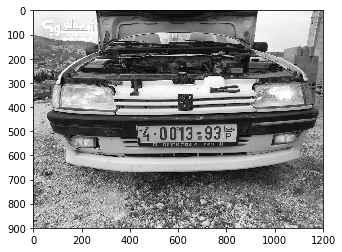

In [846]:
gray = color.rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

### Then there is two way to finde edges 
#### First robert filter 

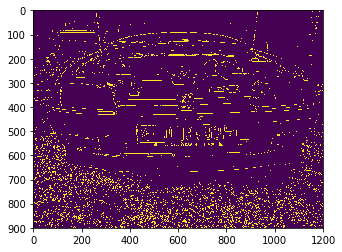

In [847]:
robert = filters.roberts(image=gray)
robert = (robert >= 0.2)*1
plt.imshow(robert)
plt.show()

#### Second sobel filter

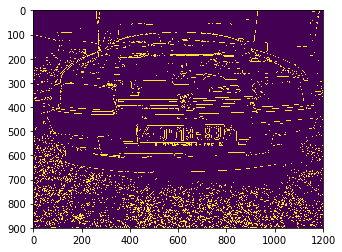

In [848]:
sobel = filters.sobel(gray)
sobel = (sobel >= 0.18)*1
plt.imshow(sobel)
plt.show()

### Then we user erosion morphology operator for reduce horizontal lines

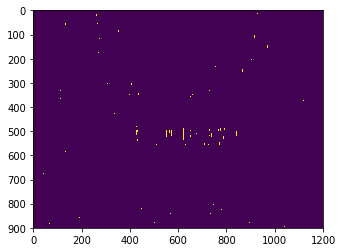

In [849]:
kernel = np.ones((3,1),np.uint8)
erosion = scipy.ndimage.morphology.binary_erosion(robert,kernel,iterations = 3)
plt.imshow(erosion)
plt.show()

### Then we use close operator for remove black dots between white areas

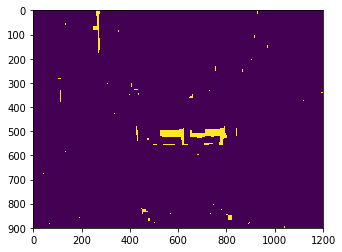

In [850]:
rec = rectangle(25,25)
closed = closing(erosion,rec)
plt.imshow(closed)
plt.show()

### Then we use dilation for Extending the white area

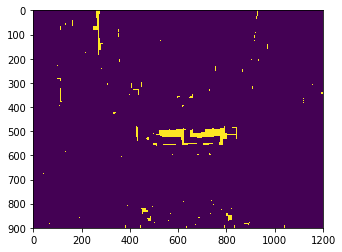

In [851]:
dia = diamond(1)
dilated = dilation(closed,dia)
plt.imshow(dilated)
plt.show()

#### Then we use erosion again for removing horizontal lines

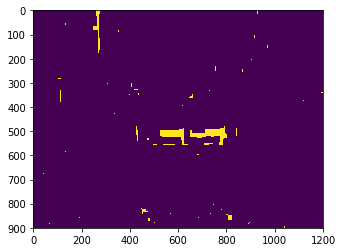

In [852]:
eroted =  scipy.ndimage.morphology.binary_erosion(dilated,dia)
plt.imshow(eroted)
plt.show()

#### use fill holes for filling area bitween two Vertical lines

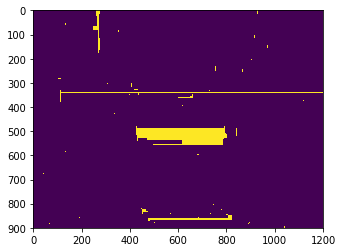

In [853]:
kernel = np.ones((1,8),np.uint8)
filled = scipy.ndimage.morphology.binary_fill_holes(eroted,structure=kernel)
plt.imshow(filled)
plt.show()

#### and at the end we are labling white areas and send the biggest one for the solution

In [854]:
label_image = skimage.measure.label(filled)
maximum = float('-Inf')
max_obj = None
for region in skimage.measure.regionprops(label_image):
    if region.area >= maximum:
        maximum = region.area
        max_obj= region

(477, 426, 559, 845)


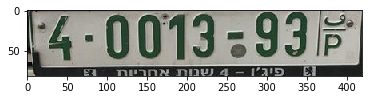

In [855]:
x = max_obj.bbox
print(x)
final_image = img[x[0]:x[2],x[1]:x[3]]
plt.imshow(final_image)
plt.show()